In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add,Dropout, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model,Sequential
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import random
import cv2
import os

In [2]:
trainpath="dataset"


In [3]:

LABELS = ('ischemia','infection')
IMG_SIZE=224
def get_data(data_dir):
    data = []
    for label in LABELS:
        path = os.path.join(data_dir, label)
        class_num = LABELS.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
train_raw = get_data(trainpath)


C:\Users\moort\AppData\Local\Temp\ipykernel_20068\1561704273.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


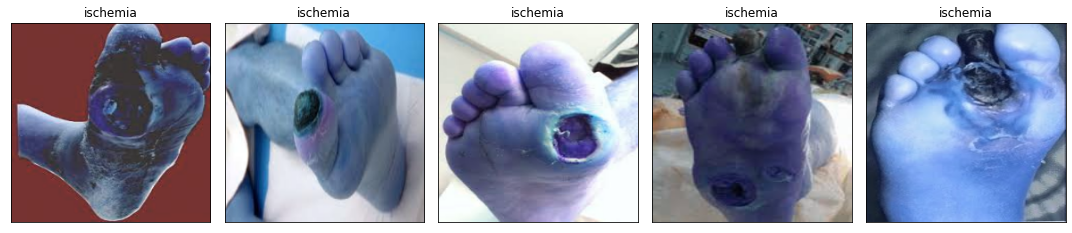

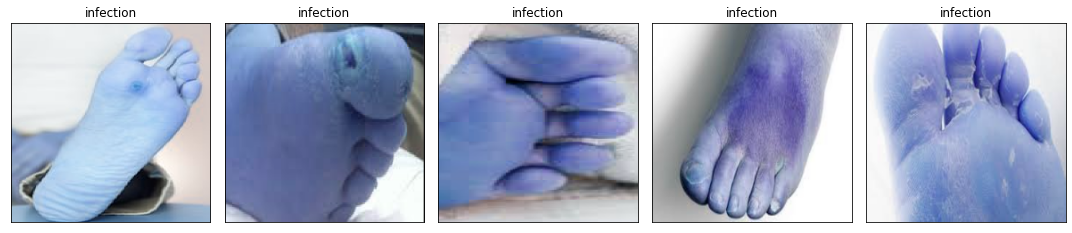

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
        img = train_raw[i][0]
        ax.imshow(img, cmap='gist_heat')
        ax.set_title("ischemia")
fig.tight_layout()    
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
        img = train_raw[-(i+1)][0]
        ax.imshow(img, cmap='gist_heat')
        ax.set_title("infection")
fig.tight_layout()
plt.show()

In [5]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

In [6]:
OPT    = Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer=OPT)

In [7]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range=30, 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.20
 )



In [8]:
train_generator = train_datagen.flow_from_directory(
    trainpath,
    target_size = (224,224),
    batch_size = 32,subset = 'training',
     class_mode = 'binary')

Found 1316 images belonging to 2 classes.


In [9]:
validation_generator = train_datagen.flow_from_directory(
    trainpath,
    target_size = (224,224),
    batch_size = 32,subset = 'validation',
    class_mode = 'binary',shuffle=True)

Found 329 images belonging to 2 classes.


In [10]:
hist = model.fit(
    train_generator,
    epochs = 15,
    validation_data = validation_generator,
)

Epoch 1/15
42/42 [==============================] - 170s 4s/step - loss: 1.6180 - accuracy: 0.5046 - val_loss: 0.6927 - val_accuracy: 0.5258
Epoch 2/15
42/42 [==============================] - 166s 4s/step - loss: 0.6612 - accuracy: 0.6003 - val_loss: 0.6343 - val_accuracy: 0.5897
Epoch 3/15
42/42 [==============================] - 164s 4s/step - loss: 0.5783 - accuracy: 0.7044 - val_loss: 0.4971 - val_accuracy: 0.7660
Epoch 4/15
42/42 [==============================] - 131s 3s/step - loss: 0.4626 - accuracy: 0.8017 - val_loss: 0.3582 - val_accuracy: 0.8511
Epoch 5/15
42/42 [==============================] - 131s 3s/step - loss: 0.3521 - accuracy: 0.8442 - val_loss: 0.2774 - val_accuracy: 0.9088
Epoch 6/15
42/42 [==============================] - 129s 3s/step - loss: 0.2517 - accuracy: 0.8891 - val_loss: 0.2319 - val_accuracy: 0.9088
Epoch 7/15
42/42 [==============================] - 132s 3s/step - loss: 0.2523 - accuracy: 0.8784 - val_loss: 0.1494 - val_accuracy: 0.9331
Epoch 8/15
42

In [11]:
model.save("./weight.h5")

In [14]:
import pickle

with open("FOOT_ULCER.pkl", "wb") as f:
    pickle.dump(hist, f)

INFO:tensorflow:Assets written to: ram://995d3d7b-b98e-43fb-8a86-2e8325577e94/assets


INFO:tensorflow:Assets written to: ram://995d3d7b-b98e-43fb-8a86-2e8325577e94/assets


In [12]:

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

NameError: name 'model_history' is not defined

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
# import numpy as np
# import pandas as pd 
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.optimizers import RMSprop,Adam
# from tensorflow.keras import layers
# from tensorflow.keras.layers import Input, Add,Dropout, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
# from tensorflow.keras.models import Model, load_model,Sequential
# from tensorflow.keras.preprocessing import image
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import imshow
# import matplotlib.pyplot as plt
# import random
# import cv2
# import os

In [1]:
model=load_model('./weight.h5')

NameError: name 'load_model' is not defined

In [ ]:
def predict(path):
    t=['infection','ischemia']
    img=image.load_img(path, target_size=(224,224))
    img=image.img_to_array(img)
    img=img/255
    plt.imshow(img)
    plt.axis('off')
    img=np.expand_dims(img,axis=0)
    p=model.predict(img)

    if(p<0.5):
        p=0
    else:
        p=1
    print("The image is of a "+t[p])
    
    

In [ ]:
predict('./dataset/infection/a1fwzSJY4.jpg')

In [ ]:
predict('./dataset/ischemia/58566823d3.jpg')